# Imágenes

- Una imagen digital puede ser interpretada como una matriz de numeros.
- Usamos PIL (Pillow) para cargar y procesar imágenes
- Imagenes a color tienen 3 dimensiones (ancho, alto, canal)
- Cada pixel tiene está codificado en RGB (Red Green Blue):
    - Rojo
    - Verde
    - Azul

In [17]:
from PIL import Image 
import numpy as np 

image_path = './cat-constelation.jpg'

img = Image.open(image_path)

imgMatrix = np.array(img)

print('Dimensiones de la imagen', imgMatrix.shape)

print('Codificación del pixel en la posición (0,0):', imgMatrix[0, 0])

rojo = imgMatrix[0, 0, 0]
verde = imgMatrix[0, 0, 1]
azul = imgMatrix[0, 0, 2]

Dimensiones de la imagen (1024, 1024, 3)
Codificación del pixel en la posición (0,0): [ 0  3 18]


## Representacion RGB (3 canales)

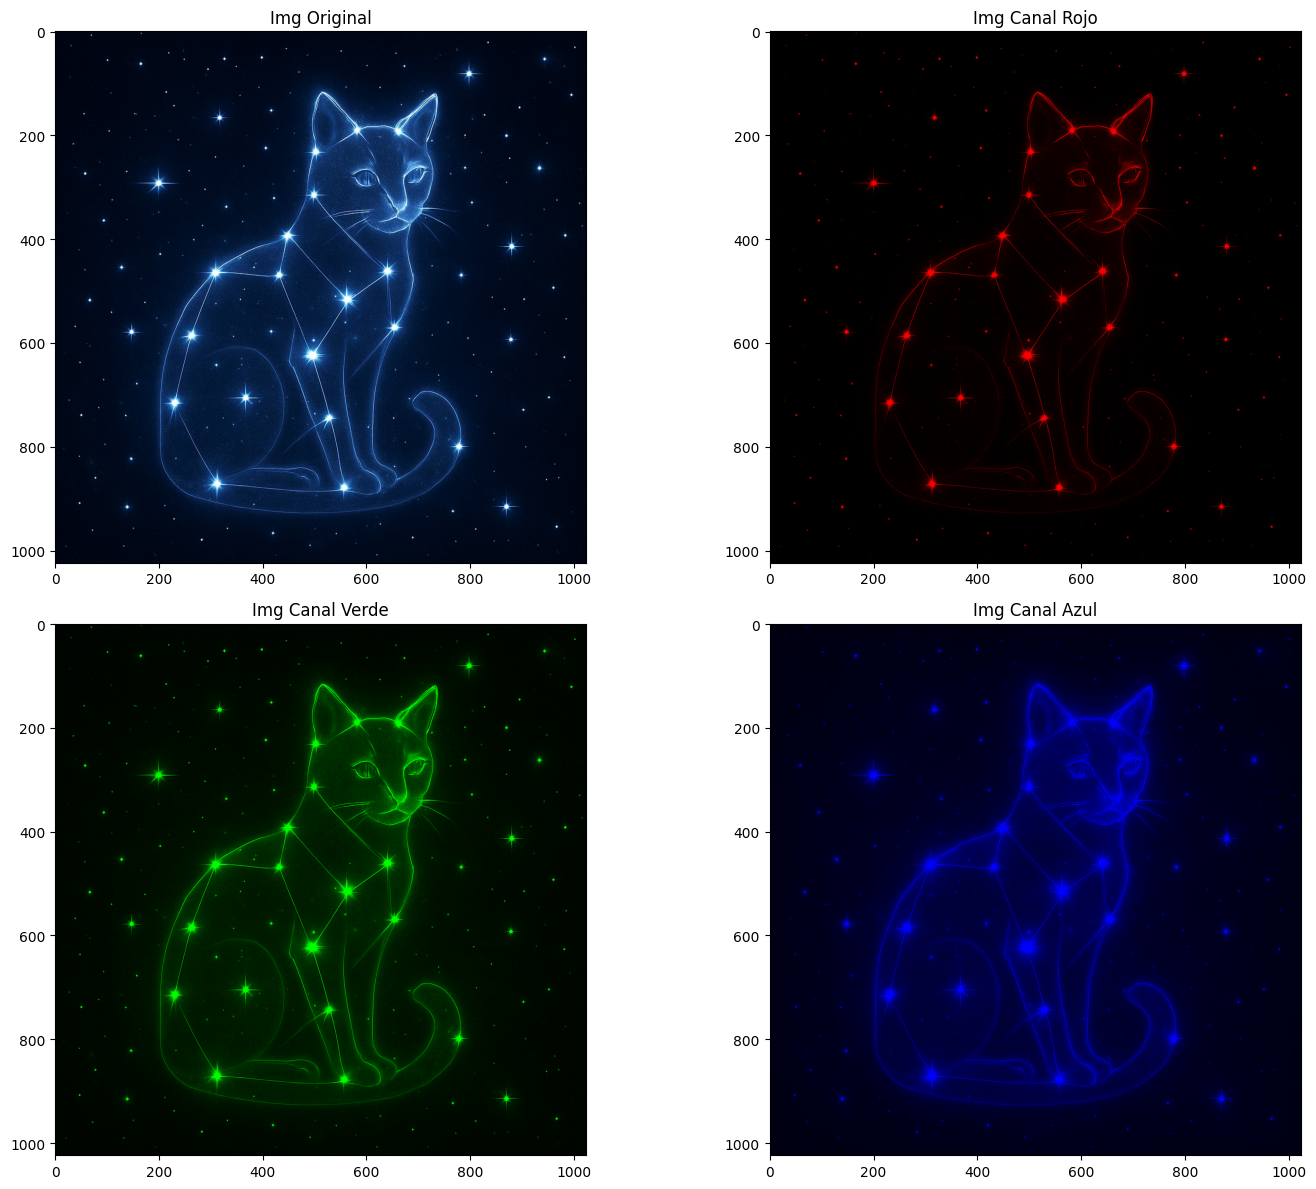

In [25]:
img_rojo = imgMatrix.copy()
img_verde = imgMatrix.copy()
img_azul = imgMatrix.copy()

# 0 -> Rojo
# 1 -> Verde
# 2 -> Azul

img_rojo[:, :, 1:] = 0 # Verde y Azul en 0 -> Manteniendo el Rojo
img_verde[:, :, [0, 2]] = 0 # Rojo y Azul en 0 -> Manteniendo el Verde
img_azul[:, :, : 2] = 0 # Rojo y Verde en 0 -> Manteniendo el Azul

import matplotlib.pyplot as plt 

fig, axs = plt.subplots(2, 2, figsize=(15, 12))
axs = axs.flatten()
axs[0].imshow(imgMatrix)
axs[0].set_title("Img Original")

axs[1].imshow(img_rojo)
axs[1].set_title("Img Canal Rojo")

axs[2].imshow(img_verde)
axs[2].set_title("Img Canal Verde")

axs[3].imshow(img_azul)
axs[3].set_title("Img Canal Azul")

plt.tight_layout()
plt.show()

## Escala de Grises

Vamos a transformar esta imagen de 3 canales en RGB a un canal en Escala de Grises. La conversión escala de grises esta sujeta a la *percepción del ojo humano* (Que tan sensible es el ojo a ese aporte de color)

**ITU-R BT.601 Standard**
* 0.299 Rojo
* 0.587 Verde es el que mas aporta a la percepcion de "brillo"
* 0.114 Azul

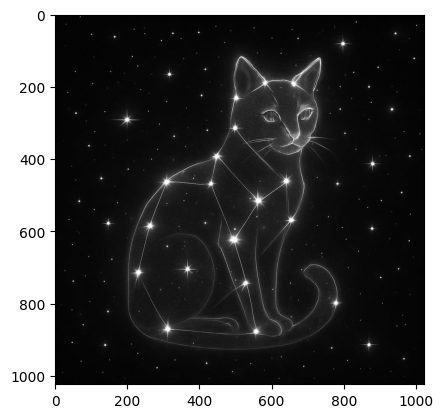

In [19]:
gris_np = (0.299 * imgMatrix[:, :, 0] + 0.587 * imgMatrix[:, :, 1] + 0.114 * imgMatrix[:, :, 2]).astype(np.uint8)
plt.imshow(gris_np, cmap='gray')
plt.show()


También se puede formar a través de `PIL`

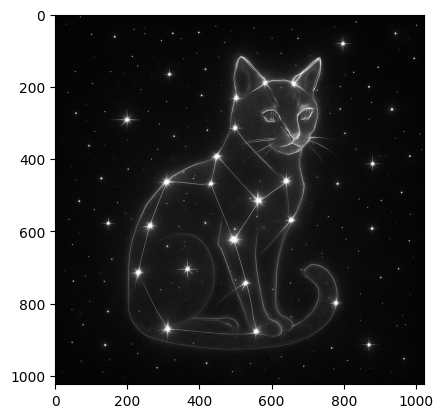

In [20]:
gris_img = img.convert('L') # luminance (grayscale)

gray_np = np.array(gris_img)

plt.imshow(gray_np, cmap='gray')
plt.show()

## HSV (Hue, Saturation and Value)

* **Hue:** codificacion del color
* **Saturacion:** pureza/intensidad del color (valores bajos se ven como palidos o sin calor)
* **Value:** brillante es el color (escala de grises)

In [21]:
HSV_img = img.convert("HSV") # 3 Canales RGB -> 3 Canales Hue, Saturation, Value

hsv_np = np.array(HSV_img)
hsv_np.shape

(1024, 1024, 3)

Text(0.5, 1.0, 'Value')

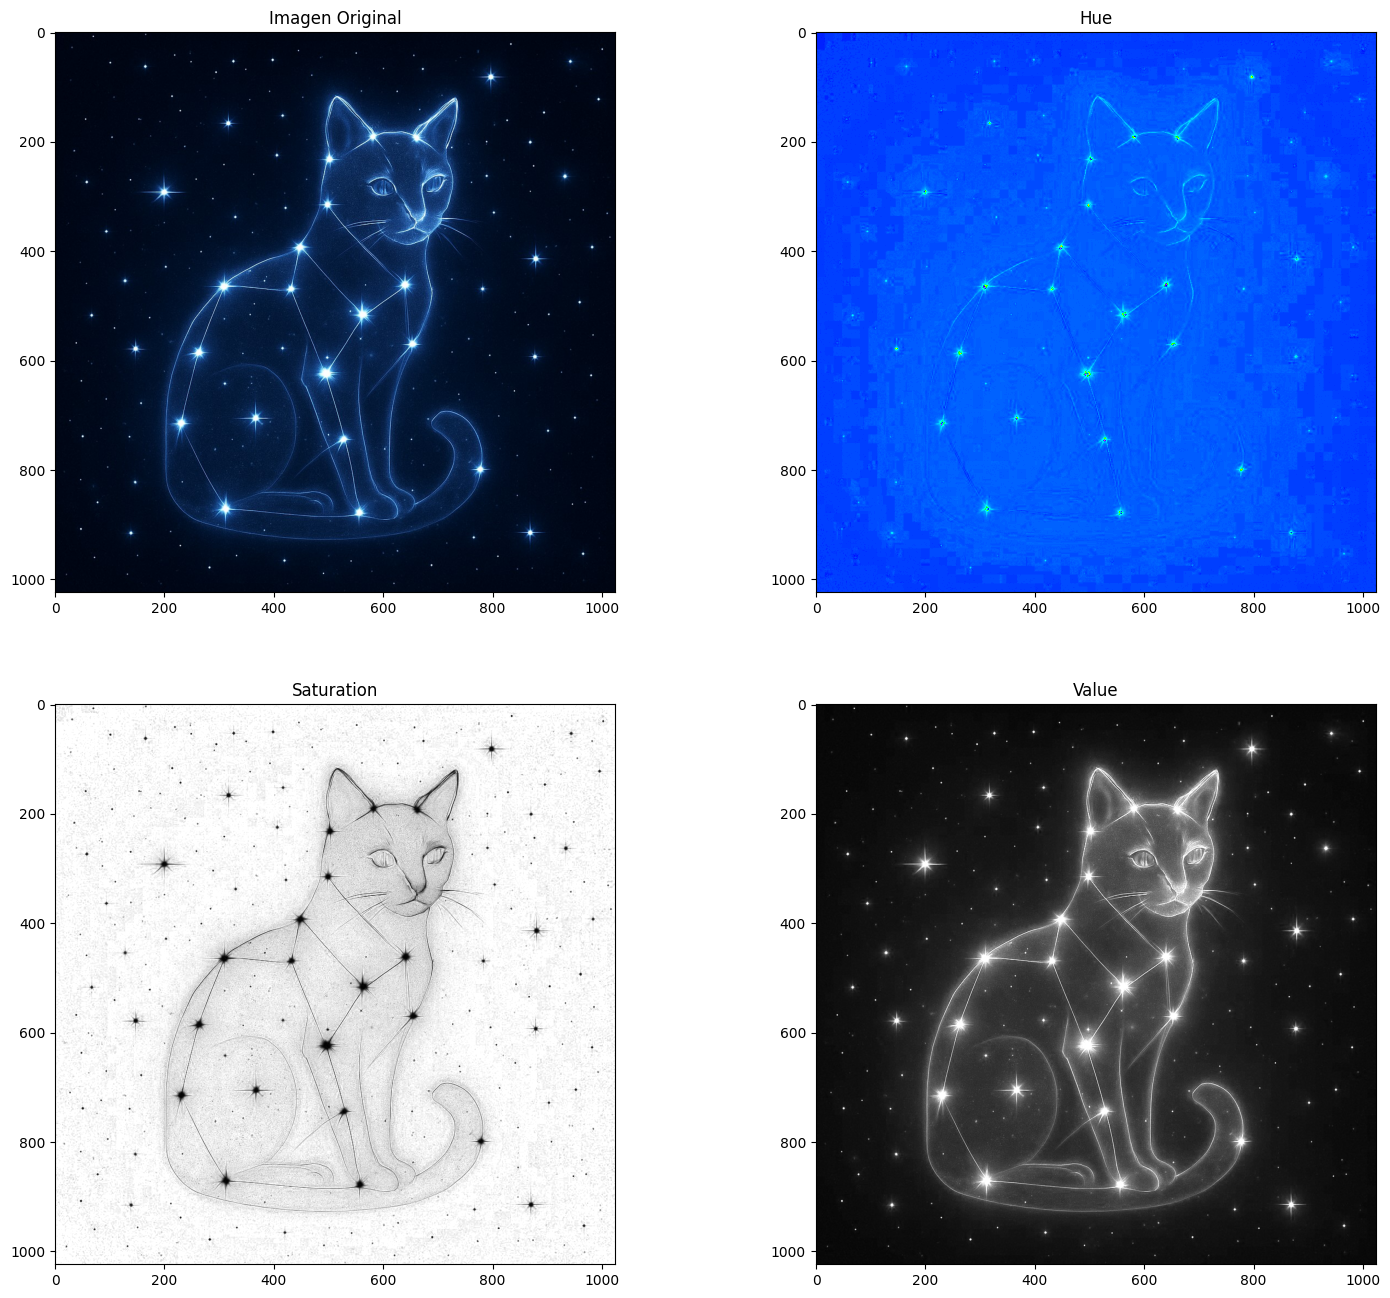

In [28]:
h, s, v = hsv_np[:, :, 0], hsv_np[:, :, 1], hsv_np[:, :, 2]

fig, axs = plt.subplots(2, 2, figsize=(18, 16))
axs = axs.flatten()

axs[0].imshow(imgMatrix)
axs[0].set_title("Imagen Original")

axs[1].imshow(h, cmap='hsv')
axs[1].set_title("Hue")


axs[2].imshow(s, cmap='gray')
axs[2].set_title("Saturation")

axs[3].imshow(v, cmap='gray')
axs[3].set_title("Value")

## Consideraciones de memoria y eficiencia

In [23]:
imgOriginal =  512 * 512 * 3 # full hd
imgGris = 512 * 512 * 1

print(imgOriginal, imgGris)

num_elementos = imgMatrix.size
item_size = imgMatrix.itemsize # tamaño en bytes que esta ocupando cada item
memoria_bytes = num_elementos * item_size
memoria_megabytes = memoria_bytes/1e6
memoria_gigabytes = memoria_bytes/1e9

print(f"Numero de Elementos: {num_elementos:.2f}")
print(f'Memoria: {memoria_bytes:.2f} bytes')
print(f'Memoria: {memoria_megabytes:.2f} megabytes')
print(f'Memoria: {memoria_gigabytes:.6f} gigabytes')

num_imgs = 60000
print(f"Memoria Necesaria para Cargar {num_imgs} imgs de esa caracteristica: {num_imgs*memoria_gigabytes:.2f} GB")

786432 262144
Numero de Elementos: 3145728.00
Memoria: 3145728.00 bytes
Memoria: 3.15 megabytes
Memoria: 0.003146 gigabytes
Memoria Necesaria para Cargar 60000 imgs de esa caracteristica: 188.74 GB
